In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
train_df = pd.read_csv("titanic/train.csv")
test_df = pd.read_csv("titanic/test.csv")


In [4]:
train_df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [5]:
test_df.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S


In [6]:
train_features = train_df[["Survived"]]
train_features

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [8]:
train_df["Sex"].unique()

array(['male', 'female'], dtype=object)

In [11]:
train_df["Gen"] = train_df["Sex"] == "male"
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gen
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,False
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,True
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,False
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,False
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,True


In [12]:
train_df["Cabin"].unique() 

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [17]:
train_df["Short_Cabin"] = train_df["Cabin"].astype(np.str_).str[0]

In [19]:
train_df["Short_Cabin"].unique()

array(['n', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [20]:
from sklearn.preprocessing import LabelEncoder


In [21]:
encoder = LabelEncoder()
encoder.fit_transform(train_df["Short_Cabin"].unique())

array([8, 2, 4, 6, 3, 0, 1, 5, 7])

In [23]:
encoder = LabelEncoder()
train_df["Cabin_numbers"] = encoder.fit_transform(train_df["Short_Cabin"])
train_df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gen,Short_Cabin,Cabin_numbers
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,True,n,8
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,False,C,2


In [25]:
train_df["Embardked_enconded"] = LabelEncoder().fit_transform(train_df["Embarked"])
train_df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gen,Short_Cabin,Cabin_numbers,Embardked_enconded
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,True,n,8,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,False,C,2,0


In [ ]:
train_numbers_df = train_df[["PassengerId",	"Survived",	"Pclass", "Age",	"SibSp",	"Parch", "Gen",	"Cabin_numbers", "Embardked_enconded"]]
train_numbers_df

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Gen,Cabin_numbers,Embardked_enconded
0,1,0,3,22.0,1,0,True,8,2
1,2,1,1,38.0,1,0,False,2,0
2,3,1,3,26.0,0,0,False,8,2
3,4,1,1,35.0,1,0,False,2,2
4,5,0,3,35.0,0,0,True,8,2
...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,True,8,2
887,888,1,1,19.0,0,0,False,1,2
888,889,0,3,NaN,1,2,False,8,2
889,890,1,1,26.0,0,0,True,2,0


In [31]:
train_numbers_df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Gen,Cabin_numbers,Embardked_enconded
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.042939,-0.030939,0.013083
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,-0.543351,-0.301116,-0.163517
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,0.131900,0.746616,0.157112
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.093254,-0.267270,-0.025252
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,-0.114631,0.041540,0.066654
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,-0.245489,-0.032548,0.038322
Gen,0.042939,-0.543351,0.131900,0.093254,-0.114631,-0.245489,1.000000,0.123076,0.104057
Cabin_numbers,-0.030939,-0.301116,0.746616,-0.267270,0.041540,-0.032548,0.123076,1.000000,0.187015
Embardked_enconded,0.013083,-0.163517,0.157112,-0.025252,0.066654,0.038322,0.104057,0.187015,1.000000


In [32]:
import seaborn as sns

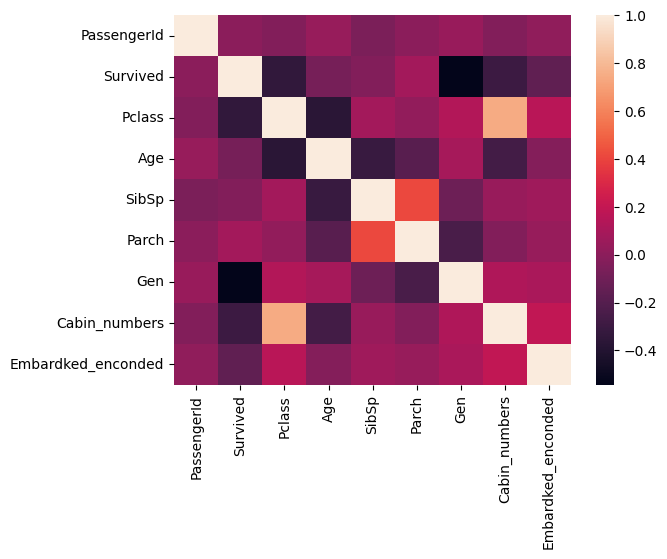

In [34]:
correlation_matrix_df = train_numbers_df.corr()
sns.heatmap(correlation_matrix_df);


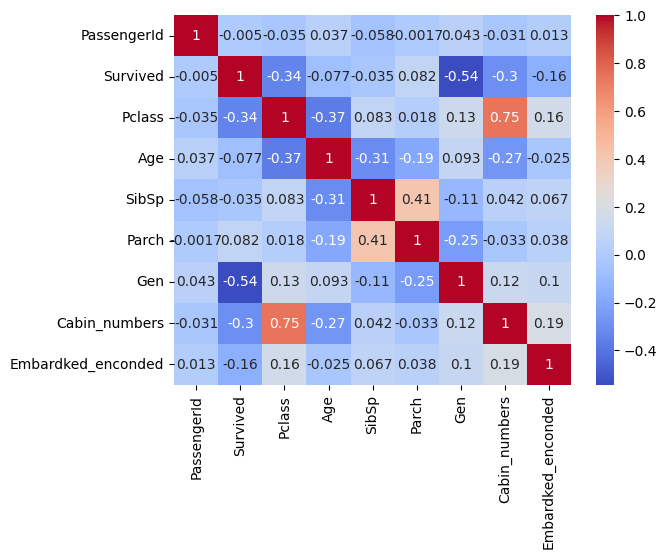

In [36]:
correlation_matrix_df = train_numbers_df.corr()
sns.heatmap(correlation_matrix_df, annot=True, cmap="coolwarm");